# Assignment 1

## Matrix Shape 정리

n : sample_data 수  
d : input_dimension  
h : hidden_layer_dimension  
c : output_dimension  

X : input_data  
W1 : layer1_weight  
b1 : layer1_bias  
H : XW1+b1   
A : activation function 거친 value   
W2 : layer2_weight  
b2 : layer2_bias  
S : AW2+b2  
P : softmax 거친 value  

**X==(n,d)**  
**W1==(d,h)** # d = 독립변수 개수, h = hidden layer의 차원의 개수      
**b1==(h,)**  # bias에서 hidden layer 각각에 영향을 준 것      
**H==(n,h)** # bias는 (n,d)* (d,h) = (n,h)에 broadcast로 더해짐          
**A==(n,h)**  # H를 activation function에 넣어 값을 바꿔 줌      
**W2==(h,c)** # h = hidden layer 차원의 개수, c = output layer 차원의 개수 (클래스의 개수)      
**b2==(c,)** # bias에서 output layer 각각에 영향을 준 것       
**S==(n,c)** # 위의 이유와 마찬가지         
**P==(n,c)** # S를 activation function에 넣어 값을 바꿔 줌     

## Matrix 미분 정리
$H = XW+b　　　(n,h) = (n,d)x(d,h)+(h,)$  
$L = f(H)$



$\frac{\partial L}{\partial W} = \frac{\partial H}{\partial W} \times \frac{\partial L}{\partial H} = X^T \times \frac{\partial L}{\partial H}$ 　  
$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial H} \times \frac{\partial H}{\partial X} = \frac{\partial L}{\partial H} \times W^T $ 　  
$\frac{\partial L}{\partial b} = 1*\frac{\partial L}{\partial H}$  

## 2Layers Chain Rule 정리
**Forward** 

$H = XW_{1} + b_{1}$  
$A = ReLU(H)$  
$S = AW_{2} + b_{2}$  
$P = Softmax(S)$  
$L = -LogLikelihood(P)$


**Backward**

$\frac{\partial L}{\partial S} = P-T$　:　T는 Label  
$\frac{\partial L}{\partial W_{2}} = \frac{\partial S}{\partial W_{2}}\frac{\partial L}{\partial S} = {A^T}\frac{\partial L}{\partial S} = {A^T}(P-T) $ 　    
$\frac{\partial L}{\partial b_{2}} = 1*\frac{\partial L}{\partial S} = P-T$  
$\frac{\partial L}{\partial A} = \frac{\partial L}{\partial S}\frac{\partial S}{\partial A} = \frac{\partial L}{\partial S}{W_{2}^T} =(P-T){W_{2}^T}$　    
$\frac{\partial L}{\partial H} = \frac{\partial A}{\partial H}\frac{\partial L}{\partial A}$  
$\frac{\partial L}{\partial W_{1}} = \frac{\partial H}{\partial W_{1}}\frac{\partial L}{\partial H} = X^{T}\frac{\partial L}{\partial H}$  
$\frac{\partial L}{\partial b_{1}} = \frac{\partial L}{\partial H}$  

# Assignment 2

`model.py`

In [ ]:
import numpy as np
import math

class TwoLayerNet():
    """
    2 Layer Network를 만드려고 합니다.

    해당 네트워크는 아래의 구조를 따릅니다.

    input - Linear - ReLU - Linear - Softmax

    Softmax 결과는 입력 N개의 데이터에 대해 개별 클래스에 대한 확률입니다.
    """

    def __init__(self, X, input_size, hidden_size, output_size, std=1e-4):
         """
         네트워크에 필요한 가중치들을 initialization합니다.
         initialized by random values
         해당 가중치들은 self.params 라는 Dictionary에 담아둡니다.

         input_size: 데이터의 변수 개수 - D
         hidden_size: 히든 층의 H 개수 - H
         output_size: 클래스 개수 - C

         """

         self.params = {}
         self.params["W1"] = std * np.random.randn(input_size, hidden_size)
         self.params["b1"] = np.random.randn(hidden_size)
         self.params["W2"] = std * np.random.randn(hidden_size, output_size)
         self.params["b2"] = np.random.randn(output_size)

    def forward(self, X, y=None):

        """

        X: input 데이터 (N, D)
        y: 레이블 (N,)

        Linear - ReLU - Linear - Softmax - CrossEntropy Loss
        
        y가 주어지지 않으면 Softmax 결과 p와 Activation 결과 a를 return합니다. p와 a 모두 backward에서 미분할때 사용합니다.
        y가 주어지면 CrossEntropy Error를 return합니다.

        """

        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        N, D = X.shape


        h = X.dot(W1)+b1 # Linear
        a = np.maximum(0, h) # ReLU: h>0일 때에는 h, h<0일 때에는 0
        o = np.dot(a,W2)+b2 # Linear
        p = np.exp(o)/np.sum(np.exp(o),axis=1).reshape(-1,1) # softmax, bias shape에 맞게 늘려준다 

        if y is None: # backpropagate를 수행하기 위해서는 y class 값에 None값이 들어가야 함 
            return p, a

       
        # CrossEntropy Loss    
        Loss = 0
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if y[i] == j:
                    Loss -= np.log(p[i][j])

        return Loss



    def backward(self, X, y, learning_rate=1e-5):
        """

        X: input 데이터 (N, D)
        y: 레이블 (N,)

        grads에는 Loss에 대한 W1, b1, W2, b2 미분 값이 기록됩니다.

        원래 backw 미분 결과를 return 하지만
        여기서는 Gradient Descent방식으로 가중치 갱신까지 합니다.

        """
        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        N = X.shape[0] # 데이터 개수
        grads = {}

        p, a = self.forward(X)
        
        
        # (softmax+cross entropy) derivative
        dp = p
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if(j==y[i]): # 일치 / 불일치 
                    dp[i][j]-=1 # p-y: 확률값에서 class 값을 빼준다 (일치하면 1, 아니면 0) 
          
        # ReLU derivative
        da = np.heaviside(a,0) # a<=0이면 da=0, a>0이면 da=1
        
        

        grads["W2"] = np.dot(a.T, dp) # A^T*(P-T)
        grads["b2"] = np.sum(dp, axis=0) # bias에 대한 영향을 모두 더해준다    
        grads["W1"] = np.dot(X.T, da*np.dot(dp,W2.T)) # X^T*(dZ/dY)
        grads["b1"] = np.sum(da*np.dot(dp,W2.T), axis=0)

        self.params["W2"] -= learning_rate * grads["W2"]
        self.params["b2"] -= learning_rate * grads["b2"]
        self.params["W1"] -= learning_rate * grads["W1"]
        self.params["b1"] -= learning_rate * grads["b1"]

    def accuracy(self, X, y):

        p, _ = self.forward(X)
        
        
        pre_p = np.argmax(p,axis=1) # 두 클래스 중 어느 클래스에 속할 확률이 높은지 체크 

        return np.sum(pre_p==y)/pre_p.shape[0]

    

    
class ThreeLayerNet():

    """
    3 Layer Network
    input - [Linear - ReLU] - [Linear - ReLU] - Linear - Softmax
    """
    
    def __init__(self, X, input_size, hidden_size1, hidden_size2, output_size, std=1e-4):

         self.params = {}
         self.params["W1"] = std * np.random.randn(input_size, hidden_size1)
         self.params["b1"] = np.random.randn(hidden_size1)
         self.params["W2"] = std * np.random.randn(hidden_size1, hidden_size2)
         self.params["b2"] = np.random.randn(hidden_size2)
         self.params["W3"] = std * np.random.randn(hidden_size2, output_size)
         self.params["b3"] = np.random.randn(output_size)

    def forward(self, X, y=None):

        """
        [Linear - ReLU] - [Linear - ReLU] - Linear - Softmax - CrossEntropy Loss        
        """

        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        W3, b3 = self.params["W3"], self.params["b3"]
        N, D = X.shape


        h1 = X.dot(W1)+b1 # Linear
        a1 = np.maximum(0, h1) # ReLU
        h2 = np.dot(a1,W2)+b2 # Linear
        a2 = np.maximum(0, h2) # ReLU
        o = np.dot(a2,W3)+b3 # Linear
        p = np.exp(o)/np.sum(np.exp(o),axis=1).reshape(-1,1) # softmax

        if y is None: 
            return p, a1, a2

       
        # CrossEntropy Loss    
        Loss = 0
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if y[i] == j:
                    Loss -= np.log(p[i][j])

        return Loss



    def backward(self, X, y, learning_rate=1e-5):

        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        W3, b3 = self.params["W3"], self.params["b3"]
        N = X.shape[0] # 데이터 개수
        grads = {}

        p, a1, a2 = self.forward(X)

        
        # (softmax+cross entropy) derivative
        dp = p
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if(j==y[i]): # 일치 / 불일치 
                    dp[i][j]-=1 # p-y: 확률값에서 class 값을 빼준다 (일치하면 1, 아니면 0) 
          
        # ReLU derivative
        da1 = np.heaviside(a1,0)
        da2 = np.heaviside(a2,0)

        
        grads["W3"] = np.dot(a2.T, dp) 
        grads["b3"] = np.sum(dp, axis=0)
        grads["W2"] = np.dot(a1.T, da2*np.dot(dp,W3.T)) 
        grads["b2"] = np.sum(da2*np.dot(dp,W3.T), axis=0)
        grads["W1"] = np.dot(X.T, da1*np.dot(da2*np.dot(dp,W3.T),W2.T)) 
        grads["b1"] = np.sum(da1*np.dot(da2*np.dot(dp,W3.T),W2.T), axis=0)
        
        
        self.params["W3"] -= learning_rate * grads["W3"]
        self.params["b3"] -= learning_rate * grads["b3"]
        self.params["W2"] -= learning_rate * grads["W2"]
        self.params["b2"] -= learning_rate * grads["b2"]
        self.params["W1"] -= learning_rate * grads["W1"]
        self.params["b1"] -= learning_rate * grads["b1"]

    def accuracy(self, X, y):

        p, _, _ = self.forward(X)
                
        pre_p = np.argmax(p,axis=1) # 두 클래스 중 어느 클래스에 속할 확률이 높은지 체크 

        return np.sum(pre_p==y)/pre_p.shape[0]


# Assignment 3

### 데이터 load

keras 프레임워크를 이용하여 데이터 로드       
32* 32 * 3차원의 데이터 ->  3072차원

In [1]:
from keras.datasets import cifar10
import numpy as np
from Model import TwoLayerNet, ThreeLayerNet
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
def preprocessing_data(x_train, x_test, y_train, y_test):
    #change dtype
    x_train = np.array(x_train, dtype=np.float64)
    x_test = np.array(x_test, dtype=np.float64)
    
    #reshaping
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    
    y_train = np.reshape(y_train, (y_train.shape[0],))
    y_test = np.reshape(y_test, (y_test.shape[0],))
        
    #normalizing
    mean_value = np.mean(x_train, axis=0)
    x_train -= mean_value
    x_test -= mean_value
    
    return x_train, x_test, y_train, y_test

In [4]:
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000,)
(10000,)


In [6]:
# train 5000개, test 1000개만 사용 
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

### 데이터 확인


In [7]:
x_train

array([[ -71.71074,  -74.05614,  -69.5538 , ...,   -3.63908,  -33.8503 ,
         -42.38186],
       [  23.28926,   40.94386,   54.4462 , ...,   16.36092,    7.1497 ,
          29.61814],
       [ 124.28926,  118.94386,  122.4462 , ...,  -46.63908,  -39.8503 ,
         -30.38186],
       ...,
       [  36.28926,   26.94386,   12.4462 , ...,  -84.63908,  -47.8503 ,
         -30.38186],
       [  23.28926,   15.94386,   -7.5538 , ...,   67.36092,  121.1497 ,
          -0.38186],
       [ -85.71074, -104.05614, -111.5538 , ...,   29.36092,   16.1497 ,
         -14.38186]])

### 하이퍼파라미터 설정
* hidden_size, epoch_size, batch_size, learning_rate

In [8]:
input_size = 32 * 32 * 3
hidden_size = 128 # hidden layer의 weight의 개수 
output_size = 10 # output target 종류의 개수 
epoch_size = 1500 # 반복 횟수 
batch_size = 100 # n개의 train data 중에서 (다 사용해서 학습시키기에는 비효율적이므로) batch size 개수만큼 뽑아서 보는 것 
learning_rate = 0.00005
N = x_train.shape[0]

### 모델 만들기

In [15]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [16]:
nn = TwoLayerNet(x_batch, input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [17]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 50 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

0 test accuracy : 0.103
0 test loss     : 2530.5576536523995
50 test accuracy : 0.21
50 test loss     : 2122.8904870853808
100 test accuracy : 0.263
100 test loss     : 1984.34811017418
150 test accuracy : 0.322
150 test loss     : 1896.6418573880455
200 test accuracy : 0.352
200 test loss     : 1835.961531855829
250 test accuracy : 0.365
250 test loss     : 1788.0987932195706
300 test accuracy : 0.367
300 test loss     : 1748.0641940996861
350 test accuracy : 0.385
350 test loss     : 1716.3556974222147
400 test accuracy : 0.387
400 test loss     : 1695.1599419906433
450 test accuracy : 0.401
450 test loss     : 1676.0968958220699
500 test accuracy : 0.4
500 test loss     : 1663.1826727584516
550 test accuracy : 0.399
550 test loss     : 1649.2319647155562
600 test accuracy : 0.402
600 test loss     : 1638.9833782514443
650 test accuracy : 0.403
650 test loss     : 1632.3261224713156
700 test accuracy : 0.41
700 test loss     : 1627.593809882068
750 test accuracy : 0.416
750 test loss

### 그림 그리기

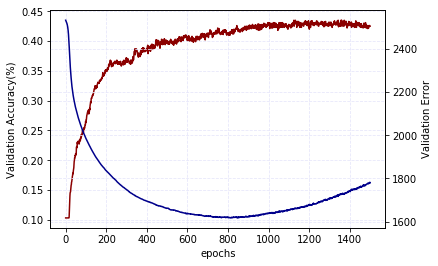

나의 최고 validation accuracy :  0.435


In [18]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')

plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')

plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

epoch=800 정도에서 loss가 가장 낮게 형성되어 있습니다. accuracy는 수렴하는 것 처럼 보입니다.

##### +) hidden_size = 256, epoch_size = 2500, learning_rate = 0.00005

In [39]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 3072) (10000, 3072) (50000,) (10000,)


In [40]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [43]:
# hyperparameter setting
input_size = 32 * 32 * 3
hidden_size = 256 
output_size = 10
epoch_size = 2500
batch_size = 100
learning_rate = 0.00005
N = x_train.shape[0]

In [44]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [45]:
nn = TwoLayerNet(x_batch, input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [46]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 50 == 0:
        print(i, " test accuracy :", nn.accuracy(x_test, y_test), "  |   test loss :", nn.forward(x_test, y_test))

0  test accuracy : 0.109   |   test loss : 2567.0864251874364
50  test accuracy : 0.239   |   test loss : 2137.6350926202326
100  test accuracy : 0.27   |   test loss : 2002.7304565554716
150  test accuracy : 0.308   |   test loss : 1922.3608717876039
200  test accuracy : 0.338   |   test loss : 1850.376616012727
250  test accuracy : 0.359   |   test loss : 1787.4289688261752
300  test accuracy : 0.376   |   test loss : 1740.588140244084
350  test accuracy : 0.379   |   test loss : 1705.950022308784
400  test accuracy : 0.38   |   test loss : 1679.9333186546432
450  test accuracy : 0.384   |   test loss : 1660.038020879837
500  test accuracy : 0.402   |   test loss : 1644.7425949396415
550  test accuracy : 0.412   |   test loss : 1632.4288594375232
600  test accuracy : 0.408   |   test loss : 1625.7311140665304
650  test accuracy : 0.417   |   test loss : 1618.643904134875
700  test accuracy : 0.419   |   test loss : 1613.4183828622479
750  test accuracy : 0.428   |   test loss : 1611.

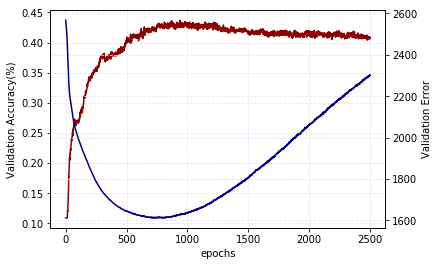

나의 최고 validation accuracy :  0.437


In [47]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')

plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')

plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

epoch=800정도에서 loss가 가장 낮고, 그 이후에 계속 가파르게 loss가 증가하고 있습니다.     
accuracy같은 경우에는 증가하다 수렴하는 형태를 보입니다.    
(epoch=1000정도에서 멈췄으면 좋았을 것 같습니다 ㅎㅁㅎ;;;) 

### +) 3 Layer NN

#### Chain Rule
**Forward** 

$H_{1} = XW_{1} + b_{1}$  
$A_{1} = ReLU(H_{1})$  
$H_{2} = A_{1}W_{2} + b_{2}$  
$A_{2} = ReLU(H_{2})$  
$S = A_{2}W_{3} + b_{3}$  
$P = Softmax(S)$  
$L = -LogLikelihood(P)$


**Backward**

$\frac{\partial L}{\partial O} = P-T$　    
$\frac{\partial L}{\partial W_{3}} = {A_{2}^T}\frac{\partial L}{\partial S} = {A_{2}^T}(P-T) $ 　    
$\frac{\partial L}{\partial b_{3}} =  P-T$    


$\frac{\partial L}{\partial W_{2}} = {A_{1}^T}\frac{\partial L}{\partial H_{2}} =      
{A_{1}^T}[\frac{\partial A_{2}}{\partial H_{2}}\frac{\partial L}{\partial A_{2}}] 
= {A_{1}^T}[\frac{\partial A_{2}}{\partial H_{2}}\frac{\partial L}{\partial H_{3}}{W_{3}^T}]
= {A_{1}^T}[\frac{\partial A_{2}}{\partial H_{2}}[P-T]{W_{3}^T}]$        
$\frac{\partial L}{\partial b_{2}} = [P-T]{W_{3}^T}$  

$\frac{\partial L}{\partial W_{1}} = {X^T}\frac{\partial L}{\partial H_{1}} = 
{X^T}[\frac{\partial A_{1}}{\partial H_{1}}\frac{\partial L}{\partial A_{1}}] 
= {X^T}[\frac{\partial A_{1}}{\partial H_{1}}[\frac{\partial H_{2}}{\partial A_{1}}\frac{\partial L}{\partial H_{2}}]]
= {X^T}[\frac{\partial A_{1}}{\partial H_{1}}[{\frac{\partial A_{2}}{\partial H_{2}}}[P-T]{W_{3}^T}]{W_{2}^T}]$        
$\frac{\partial L}{\partial b_{1}} = \frac{\partial A_{1}}{\partial H_{1}}[{\frac{\partial A_{2}}{\partial H_{2}}}[P-T]{W_{3}^T}]{W_{2}^T}$   

##### 1) hidden_size = 64, epoch_size = 1000, learning_rate = 0.0001

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 3072) (10000, 3072) (50000,) (10000,)


In [4]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [5]:
# hyperparameter setting
input_size = 32 * 32 * 3
hidden_size = 64 # 64 -> 32 -> 10
output_size = 10
epoch_size = 1000
batch_size = 100
learning_rate = 0.0001
N = x_train.shape[0]

In [6]:
batch_mask = np.random.choice(N, batch_size)
x_batch = x_train[batch_mask]

In [7]:
nn = ThreeLayerNet(x_batch, input_size=input_size, 
                   hidden_size1=hidden_size, hidden_size2=hidden_size//2, output_size=output_size)

In [8]:
history = {'val_acc': [],'val_loss': []} 

for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) 
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]

        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신

    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))

    if i % 50 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

0 test accuracy : 0.1
0 test loss     : 2850.185241387935
50 test accuracy : 0.1
50 test loss     : 2830.7012857624054
100 test accuracy : 0.1
100 test loss     : 2812.012225837772
150 test accuracy : 0.1
150 test loss     : 2794.009311965368
200 test accuracy : 0.1
200 test loss     : 2776.5800941208363
250 test accuracy : 0.1
250 test loss     : 2759.6156011894764
300 test accuracy : 0.1
300 test loss     : 2742.1406126967427
350 test accuracy : 0.1
350 test loss     : 2719.696685866075
400 test accuracy : 0.1
400 test loss     : 2672.9653911264186
450 test accuracy : 0.119
450 test loss     : 2554.417849161001
500 test accuracy : 0.147
500 test loss     : 2436.7034989706576
550 test accuracy : 0.147
550 test loss     : 2364.6116261299676
600 test accuracy : 0.149
600 test loss     : 2310.1784030015506
650 test accuracy : 0.155
650 test loss     : 2284.8764358991502
700 test accuracy : 0.149
700 test loss     : 2281.291829297368
750 test accuracy : 0.147
750 test loss     : 2279.4458

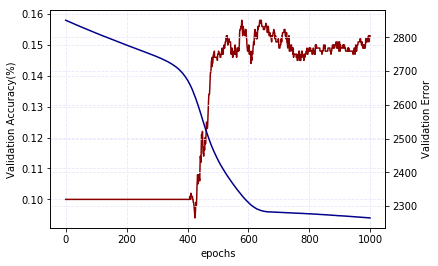

나의 최고 validation accuracy :  0.158


In [9]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')

plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')

plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

accuracy는 증가하고, loss는 감소하고 있습니다. 조금 더 추세를 살펴 보아야 한다고 생각했습니다

##### 2) hidden_size = 64, epoch_size = 3000, learning_rate = 0.0001

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 3072) (10000, 3072) (50000,) (10000,)


In [11]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [12]:
# hyperparameter setting
input_size = 32 * 32 * 3
hidden_size = 64 # 64 -> 32 -> 10
output_size = 10
epoch_size = 3000
batch_size = 100
learning_rate = 0.0001
N = x_train.shape[0]

In [13]:
batch_mask = np.random.choice(N, batch_size) 
x_batch = x_train[batch_mask]

In [14]:
nn = ThreeLayerNet(x_batch, input_size=input_size, 
                   hidden_size1=hidden_size, hidden_size2=hidden_size//2, output_size=output_size)

In [15]:
history = {'val_acc': [],'val_loss': []} 

for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) 
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]

        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신

    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))

    if i % 50 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

0 test accuracy : 0.112
0 test loss     : 2663.7273174627326
50 test accuracy : 0.112
50 test loss     : 2644.2536333258067
100 test accuracy : 0.112
100 test loss     : 2625.8951423826115
150 test accuracy : 0.112
150 test loss     : 2608.5035324894575
200 test accuracy : 0.112
200 test loss     : 2591.8010794295656
250 test accuracy : 0.112
250 test loss     : 2574.6465232979012
300 test accuracy : 0.112
300 test loss     : 2551.863005711561
350 test accuracy : 0.112
350 test loss     : 2501.4873193689555
400 test accuracy : 0.147
400 test loss     : 2397.060995920307
450 test accuracy : 0.172
450 test loss     : 2325.328424675155
500 test accuracy : 0.168
500 test loss     : 2296.995811079756
550 test accuracy : 0.171
550 test loss     : 2276.669843734255
600 test accuracy : 0.181
600 test loss     : 2262.2318614744927
650 test accuracy : 0.189
650 test loss     : 2252.943724386426
700 test accuracy : 0.194
700 test loss     : 2247.556976528889
750 test accuracy : 0.196
750 test los

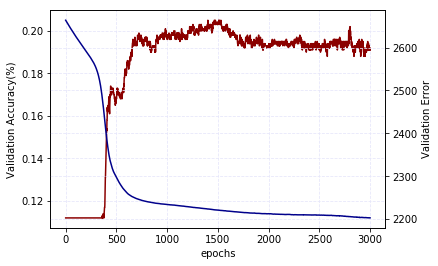

나의 최고 validation accuracy :  0.205


In [16]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')

plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')

plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

epoch도 좀 더 늘려보고, hidden size도 확 늘려보기로 했습니다 

##### 3) hidden_size = 256, epoch_size = 5000, learning_rate = 0.00005

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 3072) (10000, 3072) (50000,) (10000,)


In [4]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [5]:
# hyperparameter setting
input_size = 32 * 32 * 3
hidden_size = 256 # 256 -> 64 -> 10
output_size = 10
epoch_size = 5000
batch_size = 100
learning_rate = 0.00005
N = x_train.shape[0]

In [6]:
batch_mask = np.random.choice(N, batch_size) 
x_batch = x_train[batch_mask]

In [7]:
nn = ThreeLayerNet(x_batch, input_size=input_size, 
                   hidden_size1=hidden_size, hidden_size2=hidden_size//4, output_size=output_size)

In [11]:
history = {'val_acc': [],'val_loss': []} 

for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]

        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신

    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))

    if i % 100 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

0 test accuracy : 0.103
0 test loss     : 2776.0877912760197
100 test accuracy : 0.103
100 test loss     : 2663.4846796654815
200 test accuracy : 0.103
200 test loss     : 2574.8324076251806
300 test accuracy : 0.12
300 test loss     : 2458.646382927145
400 test accuracy : 0.145
400 test loss     : 2313.526666255363
500 test accuracy : 0.145
500 test loss     : 2276.7271552593083
600 test accuracy : 0.143
600 test loss     : 2262.7544962070797
700 test accuracy : 0.152
700 test loss     : 2254.3356267832733
800 test accuracy : 0.162
800 test loss     : 2247.6567175292157
900 test accuracy : 0.164
900 test loss     : 2243.223394523343
1000 test accuracy : 0.161
1000 test loss     : 2240.64809451953
1100 test accuracy : 0.158
1100 test loss     : 2239.0940788245516
1200 test accuracy : 0.157
1200 test loss     : 2237.1421980267664
1300 test accuracy : 0.16
1300 test loss     : 2234.6469234773544
1400 test accuracy : 0.162
1400 test loss     : 2229.6848515665783
1500 test accuracy : 0.162

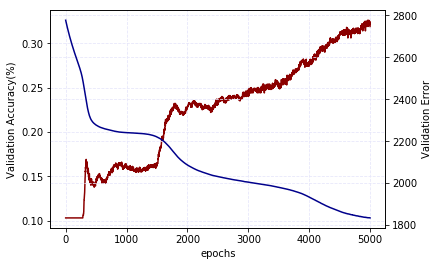

나의 최고 validation accuracy :  0.326


In [12]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')

plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')

plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

loss는 계속 감소하고 있고, accuracy는 계속 증가하고 있습니다! 

##### 4) hidden_size = 256, epoch_size = 7000, learning_rate = 0.00005

In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 3072) (10000, 3072) (50000,) (10000,)


In [26]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [34]:
# hyperparameter setting
input_size = 32 * 32 * 3
hidden_size = 256 # 256 -> 64 -> 10
output_size = 10
epoch_size = 7000
batch_size = 100
learning_rate = 0.00005
N = x_train.shape[0]

In [35]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [36]:
nn = ThreeLayerNet(x_batch, input_size=input_size, 
                   hidden_size1=hidden_size, hidden_size2=hidden_size//4, output_size=output_size)

In [37]:
history = {'val_acc': [],'val_loss': []} 

for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]

        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신

    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))

    if i % 50 == 0:
        print(i, " test accuracy :", nn.accuracy(x_test, y_test), "  |   test loss :", nn.forward(x_test, y_test))

0  test accuracy : 0.106   |   test loss : 3006.4629371802494
50  test accuracy : 0.106   |   test loss : 2902.9828833812185
100  test accuracy : 0.106   |   test loss : 2813.202496623831
150  test accuracy : 0.106   |   test loss : 2730.921075268775
200  test accuracy : 0.11   |   test loss : 2621.407716751015
250  test accuracy : 0.154   |   test loss : 2491.9629675298756
300  test accuracy : 0.163   |   test loss : 2428.9264414984295
350  test accuracy : 0.133   |   test loss : 2362.7211275371433
400  test accuracy : 0.147   |   test loss : 2315.2273649791578
450  test accuracy : 0.147   |   test loss : 2292.6421059079503
500  test accuracy : 0.135   |   test loss : 2278.9031373903863
550  test accuracy : 0.117   |   test loss : 2270.59489348193
600  test accuracy : 0.121   |   test loss : 2265.890682932031
650  test accuracy : 0.124   |   test loss : 2262.3281361343406
700  test accuracy : 0.123   |   test loss : 2259.9720527903037
750  test accuracy : 0.125   |   test loss : 2258.

6400  test accuracy : 0.308   |   test loss : 1985.0587883570402
6450  test accuracy : 0.308   |   test loss : 1987.2444681093186
6500  test accuracy : 0.315   |   test loss : 1988.9944363486434
6550  test accuracy : 0.318   |   test loss : 1990.9516926252143
6600  test accuracy : 0.32   |   test loss : 1994.3000354646672
6650  test accuracy : 0.32   |   test loss : 1996.937814000179
6700  test accuracy : 0.32   |   test loss : 2002.3253669896071
6750  test accuracy : 0.321   |   test loss : 2006.8562665271354
6800  test accuracy : 0.325   |   test loss : 2012.1515823462812
6850  test accuracy : 0.329   |   test loss : 2015.3658526973038
6900  test accuracy : 0.33   |   test loss : 2022.2883083469292
6950  test accuracy : 0.332   |   test loss : 2025.1486761255594


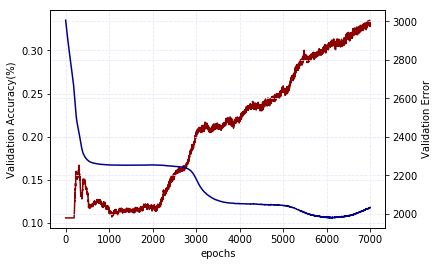

나의 최고 validation accuracy :  0.335


In [38]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')

plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')

plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))

epoch을 더 늘려서 살펴보았더니, accuracy는 쭉쭉 증가하지만, epoch=6000정도부터 오히려 loss가 증가하는 형태를 보이기 시작합니다......

### 결론

#### 1. 결과 정리 

**2 Layer NN**       


| No.| hidden_size | epoch_size | learning_rate | accuracy | 최적 epoch 위치 |   
|:---:|:---:|:---:|:---:|:---:|:---:|  
| 1 | 128 | 1500 | 0.00005 | 0.435 | 800 정도 |  
| 2 | 256 | 2500 | 0.00005 | 0.437 | 800 정도 |

**3 Layer NN**    



| No.| hidden_size | epoch_size | learning_rate | accuracy | 최적 epoch 위치 |   
|:---:|:---:|:---:|:---:|:---:|:---:|  
| 3 | 64 | 1000 | 0.0001 | 0.158 |   |  
| 4 | 64 | 3000 | 0.0001 | 0.205 |   |
| 5 | 256 | 5000 | 0.00005 | 0.326 |   |
| 6 | 256 | 7000 | 0.00005 | 0.335 | 6000 정도 |

#### 2. 결과 해석

**1. Why 2 Layer > 3 Layer?**
- **최적화** 문제 
    - 층을 깊게 쌓아가는 MLP에서는 loss function을 최소화하기 위한 방법으로 gradient descent를 잘 사용하지 않습니다      
      (모든 training data에 대해 gradient를 전부 계산하고, 한 번 update 한 뒤에 다시 찾는 과정이 너무 비효율적이기 때문에...) 
    - 적절한 Optimizer를 사용하거나, dropout을 추가하는 등의 방법을 통해 학습식을 개선해야 성능이 더욱 높아질 것이라 생각됩니다       
      (MLP로 깊게 층을 쌓으면 성능이 올라가는 것은 사실이지만, parameter가 늘어나면서 수렴하기 어려운 현상이 발생하기 때문)
      
**2. Accuracy & Loss**

- **Overfitting**: <U>High Validation Accuracy + High Loss Function</U> (2번, 6번 case)   
    - Training Data에 Overfitting 되어 있다는 것을 의미합니다    
    
    - overfitting의 경우 accuracy로 체크하기 보다는 loss로 체크해 보아야 합니다      
      ex) binary classification에서 softmax output = (0.6, 0.4)이라는 결과가 나왔을 때, (1,0)으로 분류해 줄 것입니다        
      accuracy의 경우 discontinuous 하므로 <-> output의 크기를 고려해서 반환해 주는 것이 아니기 때문에      
      accuracy는 늘어나도 loss가 줄어드는 결과가 나타날 수 있는 것입니다       
- 따라서 적절한 batch size, epoch size, learning rate를 설정하는 것이 무엇보다 중요합니다    